# Deep-learning Challenge Problem
## 1. 임의의 서로 다른 2개 영상 A,B를 아래와 같이 9분할한다.
### A. 분할된 Sub-block의 크기는 40x40
### B. 9분할 과정에서 분할된 블록간 간격을 4로 설정

## 서로 다른 영상 A,B Load

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

In [48]:
base_path = 'data/Linnaeus_5_128X128/train/'
#berry dog
berry_path = 'berry/'
dog_path = 'dog/'

random_idx = np.random.randint(0, 1200) #1200장

In [49]:
print(random_idx)

1117


In [54]:
berry_img = Image.open(base_path + berry_path + str(random_idx) + '_128.jpg')
dog_img = Image.open(base_path + dog_path + str(random_idx) + '_128.jpg')

Text(0.5, 1.0, 'dog')

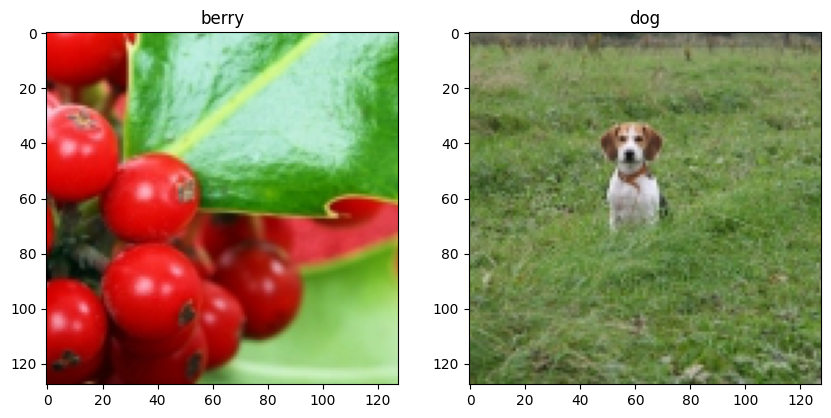

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(berry_img)
ax1.set_title('berry')
ax2.imshow(dog_img)
ax2.set_title('dog')

In [62]:
type(berry_img) #연산 못함

PIL.JpegImagePlugin.JpegImageFile

In [63]:
berry_img = np.array(berry_img)
dog_img = np.array(dog_img)
#numpy로 바꾸기

# 분할하기

In [64]:
berry_img.shape

(128, 128, 3)

In [94]:
# [x: 0 ~ 40 y: 0 ~ 40] [x: 44 ~ 84 y: 0 ~ 40] [x: 88 ~ 128 y: 0 ~ 40] 
# [x: 0 ~ 40 y: 44 ~ 84] [x: 44 ~ 84 y: 44 ~ 84] [x: 88 ~ 128 y: 44 ~ 84] 
# [x: 0 ~ 40 y: 88 ~ 128] [x: 44 ~ 84 y: 88 ~ 128] [x: 88 ~ 128 y: 88 ~ 128]

sub_block1 = []
sub_block2 = []

y = 0
for i in range(3):
    x = 0
    for j in range(3):
        sub_block1.append(berry_img[y:y+40, x:x+40, :])
        sub_block2.append(dog_img[y:y+40, x:x+40, :])
        x = x + 40
    y = y + 40

(40, 40, 3)

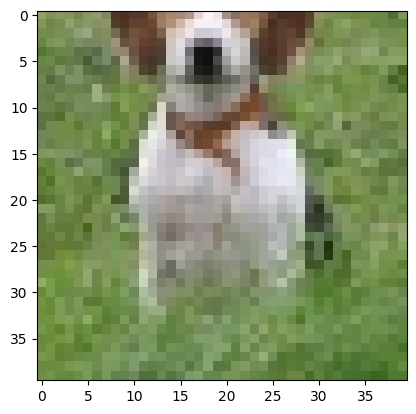

In [95]:
plt.imshow(sub_block2[4])
sub_block1[0].shape

In [96]:
len(sub_block2)

9

# 랜덤 조합으로 영상생성

In [97]:
import random

In [235]:
random_idx1 = [0,1,2,3,4,5,6,7,8]
random_idx2 = [0,1,2,3,4,5,6,7,8]

new_img = np.full((120, 240, 3), 0, dtype=np.uint8) #8비트로 2,4,8,16,32,84,128,256

positions = list(np.arange(0,18))
while len(positions) != 0:
    #! 1번쨰 사진 뽑기 및 위치
    random_val1 = random.choice(random_idx1)
    random_val2 = random.choice(random_idx2)
    position = random.choice(positions)
    row = position // 6
    col = position % 6 
    start_x = 40 * col
    end_x = 40 * col + 40
    
    start_y = 40 * row
    end_y = 40 * row + 40
    
    block1 = sub_block1[random_val1]
    new_img[start_y:end_y, start_x:end_x, :] = block1
    
    
    positions.remove(position)
    random_idx1.remove(random_val1)
    
    #! 2번째 사진 뽑기 및 위치 시키기
    random_val2 = random.choice(random_idx2)
    position = random.choice(positions)
    row = position // 6
    col = position % 6 
    start_x = 40 * col
    end_x = 40 * col + 40
    start_y = 40 * row
    end_y = 40 * row + 40
    

    block2 = sub_block2[random_val2]
    
    
    new_img[start_y:end_y, start_x:end_x, :] = block2
    
    positions.remove(position)
    random_idx2.remove(random_val2)
    

In [236]:
positions = np.arange(0,18)
position = random.choice(positions)
print(position)
row = position % 6
col = position // 6 
print(row, col)

4
4 0


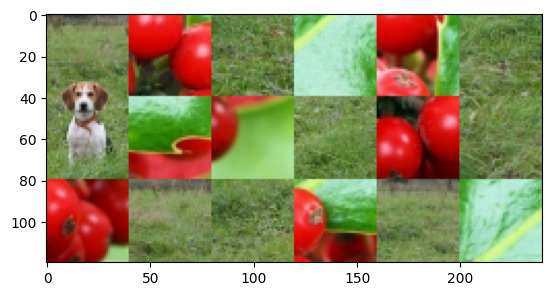

In [237]:
plt.imshow(new_img)

In [2]:
from data.dataset import LinnaeusDataset

In [3]:
dataset = LinnaeusDataset(split = 'train')

In [4]:
dataset.dog_samples

['c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/train/dog\\1000_128.jpg',
 'c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/train/dog\\1001_128.jpg',
 'c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/train/dog\\1002_128.jpg',
 'c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/train/dog\\1003_128.jpg',
 'c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/train/dog\\1004_128.jpg',
 'c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/train/dog\\1005_128.jpg',
 'c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/train/dog\\1006_128.jpg',
 'c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/train/dog\\1007_128.jpg',
 'c:\\Users\\hjjh2\\workspace\\Computer-Vision-Study\\project1\\data/Linnaeus_5_128X128/

In [5]:
img, label = dataset.__getitem__(0)

In [6]:
img

tensor([[[0.8078, 0.8039, 0.8039,  ..., 0.8196, 0.8275, 0.8157],
         [0.7961, 0.7961, 0.7961,  ..., 0.8039, 0.8235, 0.8118],
         [0.8039, 0.8000, 0.8118,  ..., 0.7922, 0.8118, 0.8039],
         ...,
         [0.1020, 0.0549, 0.0235,  ..., 0.2000, 0.1373, 0.2314],
         [0.1098, 0.1451, 0.1294,  ..., 0.1451, 0.1098, 0.2314],
         [0.2471, 0.3059, 0.1216,  ..., 0.5294, 0.0863, 0.0824]],

        [[0.8431, 0.8392, 0.8392,  ..., 0.8549, 0.8627, 0.8510],
         [0.8314, 0.8314, 0.8314,  ..., 0.8431, 0.8588, 0.8392],
         [0.8471, 0.8392, 0.8471,  ..., 0.8314, 0.8471, 0.8314],
         ...,
         [0.1451, 0.0863, 0.0471,  ..., 0.2471, 0.2000, 0.2941],
         [0.1647, 0.1882, 0.1608,  ..., 0.1922, 0.1647, 0.2863],
         [0.3098, 0.3608, 0.1647,  ..., 0.5647, 0.1294, 0.1333]],

        [[0.8784, 0.8745, 0.8745,  ..., 0.8824, 0.8980, 0.8863],
         [0.8667, 0.8667, 0.8667,  ..., 0.8784, 0.8941, 0.8784],
         [0.8706, 0.8745, 0.8824,  ..., 0.8667, 0.8824, 0.

In [7]:
img.shape

torch.Size([3, 120, 240])

In [8]:
label

tensor([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1],
       dtype=torch.uint8)

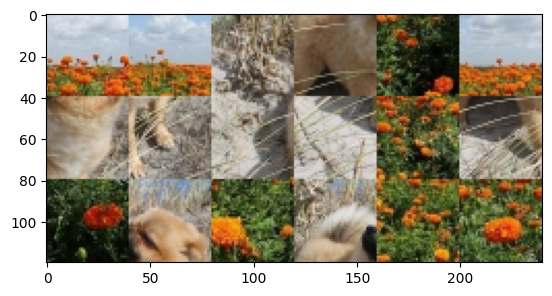

In [9]:
import matplotlib.pyplot as plt
plt.imshow(img.permute(1,2,0).numpy())

In [10]:
label

tensor([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1],
       dtype=torch.uint8)

In [53]:
import torch
data_loader = torch.utils.data.DataLoader(dataset, batch_size = 8, shuffle=True)

In [54]:
data_iter = iter(data_loader)
img, label = next(data_iter)

In [55]:
img.shape

torch.Size([8, 3, 120, 240])

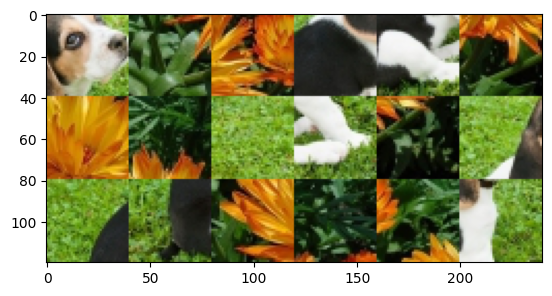

In [56]:
plt.imshow(img.permute(0,2,3,1)[7].numpy())

# model check

In [1]:
from model.resnet import ResNet
import torch

c:\Users\hjjh2\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
layers = [2,2,2,2,2]
model = ResNet(layers=layers)

In [3]:
model

ResNet(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [4]:
dummpy_input = torch.randn(1,3,120,240)
model.eval()
out = model(dummpy_input)

In [5]:
out.shape

torch.Size([1, 18])

In [6]:
8 * 15 * 15

1800

In [7]:
#정답지 , output 도 18개